In [104]:
import pandas as pd

data1 = pd.read_csv('../../raw/통합 테이블(공원)_2019.csv')
data2 = pd.read_csv('../../raw/지역사회건강조사 (전처리된 데이터)_2019/통합 테이블(건강)_2019.csv')
data3 = pd.read_csv('../../raw/서울시 주민등록인구 (연령별구별) 통계_2019_Q4.csv')
data2.rename(columns={'지역':'자치구'},inplace = True)
data3.set_index('자치구',inplace = True)
data3 = data3[['주민등록인구']]
df2 = data2[data2['연령별'] == '계']
df2 = df2[df2['성별'] == '계']
df2.set_index('자치구',inplace = True)
data1.set_index('자치구',inplace = True)
df = pd.concat([df2,data1,data3],axis=1)
df = df.drop(df.index[0])
df = df.drop(['연령별','성별'],axis=1)
data3 = pd.read_csv('../../raw/서울시 자치구 재정자립도_2019.csv')
data4 = pd.read_csv('../../raw/서울시 신고_등록 체육시설 통계_2019.csv')
df2 = data2[data2['연령별'] == '계']
df2 = df2[df2['성별'] == '계']
df2.set_index('자치구',inplace = True)
data3.set_index('자치구',inplace = True)
data4.set_index('자치구',inplace = True)
df = pd.concat([df2,data1,data3,data4],axis=1)
df = df.drop(df.index[0])
df = df.drop(['연령별','성별'],axis=1)
df = df[['주관적 건강수준','체중조절 경험 여부','걷기 실천','격렬한 신체활동 실천','중등도 신체활동 실천',
         '주관적 스트레스 수준','우울감 경험률','행복감 지수','1인당 체육시설','1인당 생활권 도시림 면적','재정자립도','1인당 연소득']]
df.reset_index(inplace = True)
df.reset_index(inplace=True)
df.columns

Index(['index', '자치구', '주관적 건강수준', '체중조절 경험 여부', '걷기 실천', '격렬한 신체활동 실천',
       '중등도 신체활동 실천', '주관적 스트레스 수준', '우울감 경험률', '행복감 지수', '1인당 체육시설',
       '1인당 생활권 도시림 면적', '재정자립도', '1인당 연소득'],
      dtype='object')

,주민등록인구,10대 이하,19-44,45-64,65-74,70대 이상
자치구,,,,,,
서울시,10010983,1511483,3840945,3173283,883211,602061
종로구,161869,21277,61014,52059,14713,12806
중구,136488,15979,53831,43403,12915,10360
용산구,245185,33152,96832,76410,20719,18072
성동구,308979,44259,124318,96455,25425,18522
광진구,366972,51136,154091,113843,28692,19210
동대문구,363023,49058,143780,110835,34172,25178
중랑구,402024,53808,145653,137399,39563,25601
성북구,454744,71624,169891,142379,40112,30738


In [161]:
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import matplotlib.font_manager as fm

plt.rcParams['axes.unicode_minus'] = False
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
plt.rcParams["font.family"] = 'NEXON Lv1 Gothic Low OTF'
font_list

['C:\\Windows\\Fonts\\LBRITE.TTF',
 'C:\\Windows\\Fonts\\seguiemj.ttf',
 'C:\\Windows\\Fonts\\CALISTI.TTF',
 'C:\\Windows\\Fonts\\ebrima.ttf',
 'C:\\Windows\\Fonts\\BOD_CB.TTF',
 'C:\\Windows\\Fonts\\NEXON Lv1 Gothic Low OTF Bold.otf',
 'C:\\Windows\\Fonts\\segoeprb.ttf',
 'C:\\Windows\\Fonts\\ARIALNI.TTF',
 'C:\\Windows\\Fonts\\msyhbd.ttc',
 'C:\\Windows\\Fonts\\times.ttf',
 'C:\\Windows\\Fonts\\BROADW.TTF',
 'C:\\Windows\\Fonts\\NanumBarunGothicLight.ttf',
 'C:\\Windows\\Fonts\\tahoma.ttf',
 'C:\\Windows\\Fonts\\CASTELAR.TTF',
 'C:\\Windows\\Fonts\\GOUDYSTO.TTF',
 'C:\\Windows\\Fonts\\LSANSI.TTF',
 'C:\\Windows\\Fonts\\LBRITEI.TTF',
 'C:\\Windows\\Fonts\\MAIAN.TTF',
 'C:\\Windows\\Fonts\\LTYPE.TTF',
 'C:\\Windows\\Fonts\\CENSCBK.TTF',
 'C:\\Windows\\Fonts\\GIGI.TTF',
 'C:\\Windows\\Fonts\\HMKMRHD.TTF',
 'C:\\Windows\\Fonts\\CALIFB.TTF',
 'C:\\Windows\\Fonts\\ONYX.TTF',
 'C:\\Windows\\Fonts\\NEXON Lv1 Gothic Low OTF.otf',
 'C:\\Windows\\Fonts\\palai.ttf',
 'C:\\Windows\\Fonts\\MTCORSV

Text(0.515, 0.12, '재정자립도')

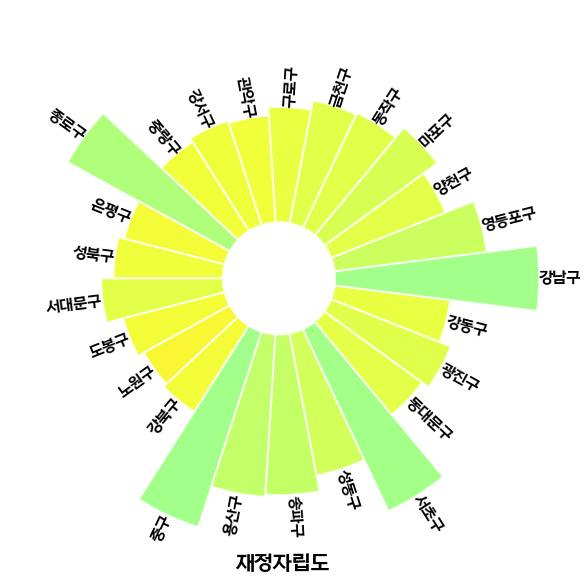

In [188]:
# initialize the figure
plt.figure(figsize=(20,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Set the coordinates limits
upperLimit = 100
lowerLimit = 15

# Compute max and min in the dataset
max = df['재정자립도'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * df['재정자립도'] + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
)

# little space between the bar and the label
labelPadding = 0

# Add labels
for bar, angle, height, label,value in zip(bars,angles, heights, df["자치구"],df['재정자립도']):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"
    bar.set_facecolor(plt.cm.jet(1-((value/300)+0.3)))
    bar.set_alpha(0.8)  

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor",
        fontsize = 15,
        fontweight ='bold'
    ) 
plt.suptitle('재정자립도',x= 0.515,y=0.12,fontsize =20,fontweight ='bold')

Text(0.515, 0.15, '1인당 연소득')

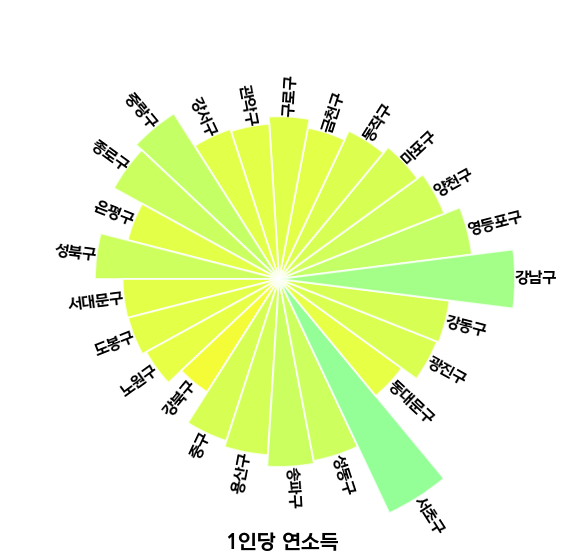

In [190]:
# initialize the figure
plt.figure(figsize=(20,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Set the coordinates limits
upperLimit = 100
lowerLimit = 15

# Compute max and min in the dataset
max = df['1인당 연소득'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * df['1인당 연소득'] + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
)

# little space between the bar and the label
labelPadding = 0

# Add labels
for bar, angle, height, label,value in zip(bars,angles, heights, df["자치구"],df['1인당 연소득']):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"
    bar.set_facecolor(plt.cm.jet(1-((value/10000)+0.2)))
    bar.set_alpha(0.8)  

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor",
        fontsize = 15,
        fontweight ='bold'
    )
plt.suptitle('1인당 연소득',x= 0.515,y=0.15,fontsize =20,fontweight ='bold')

Text(0.515, 0.07, '행복감 지수')

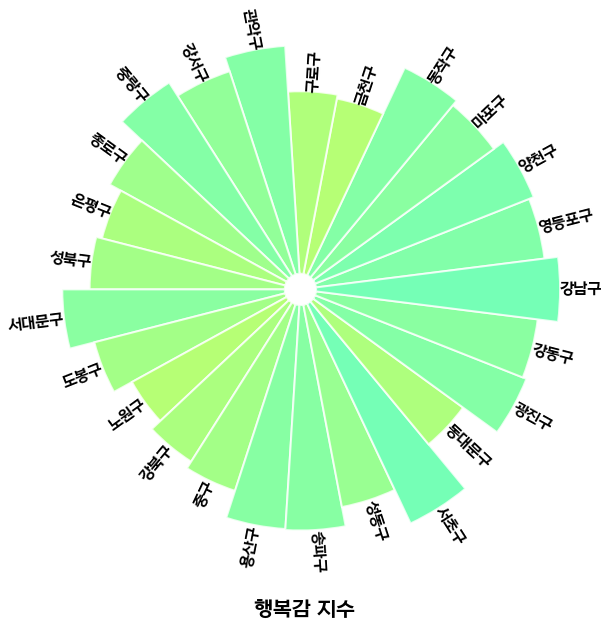

In [199]:
# initialize the figure
plt.figure(figsize=(20,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Set the coordinates limits
upperLimit = 100
lowerLimit = 15

# Compute max and min in the dataset
max = (df['행복감 지수'].max()-5)*100

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * (df['행복감 지수']-5)*100 + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
)

# little space between the bar and the label
labelPadding = 0

# Add labels
for bar, angle, height, label,value in zip(bars,angles, heights, df["자치구"],df['행복감 지수']):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"
    bar.set_facecolor(plt.cm.jet(1-((value/7)-0.5)))
    bar.set_alpha(0.8)  

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor",
        fontsize = 15,
        fontweight ='bold'
    )
plt.suptitle('행복감 지수',x= 0.515,y=0.07,fontsize =20,fontweight ='bold')

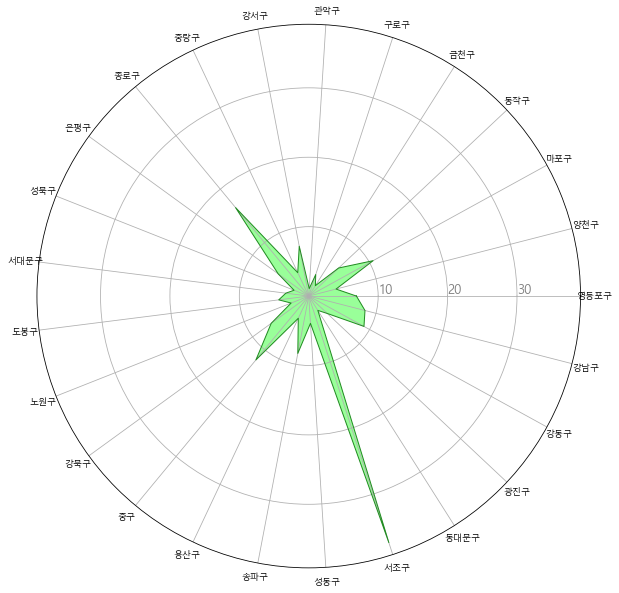

In [41]:
# Libraries
import matplotlib.pyplot as plt
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D
from matplotlib.path import Path
import pandas as pd
from math import pi

#df1 = df['자치구','1인당 생활권 도시림 면적']

df1 = df[['자치구','1인당 생활권 도시림 면적']].T
df2 = df1.rename(columns=df1.iloc[0])
df3 = df2.drop(df2.index[0])
df3.reset_index(inplace=True)
 
# ------- PART 1: Create background
fig, ax = plt.subplots( figsize=(10,10) )
# number of variable
categories=list(df3)[1:]
N = len(categories)
 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=df3.loc[0].drop('index').values.flatten().tolist()
values += values[:1]
values
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories, color='black', size=9)
 
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=13)
 
# Plot data
ax.plot(angles, values, linewidth=1,color= 'forestgreen', linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'lime', alpha=0.4)


# Show the graph
plt.show()